<h1>Individual Assignment - B260235 </h1>

Table of Contents:
- [Data Preprocessing](#preprocess)
- [Business Question and Data Analysis](#analysis)
- [Report](#report)

<a id="preprocess"></a>
<h2>Data Preprocessing</h2>

In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
df = pd.read_csv('telecom.csv')

# see the first 3 rows of the data
df.head(3)

,Customer ID,Gender,Age,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Score,CLTV,Churn Reason
0,8779-QRDMV,Male,78,No,No,0,United States,California,Los Angeles,90022,...,39.65,0.00,20,0.00,59.65,3,Churned,91,5433,Competitor offered more data
1,7495-OOKFY,Female,74,Yes,Yes,1,United States,California,Los Angeles,90063,...,633.30,0.00,0,390.80,1024.10,3,Churned,69,5302,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,3,United States,California,Los Angeles,90065,...,1752.55,45.61,0,203.94,1910.88,2,Churned,81,3179,Competitor made better offer


In [3]:
# inspect on data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   Country                            7043 non-null   object 
 7   State                              7043 non-null   object 
 8   City                               7043 non-null   object 
 9   Zip Code                           7043 non-null   int64  
 10  Latitude                           7043 non-null   float64
 11  Longitude                          7043 non-null   float

In [4]:
# inspect on data duplication
df.duplicated().sum()

0

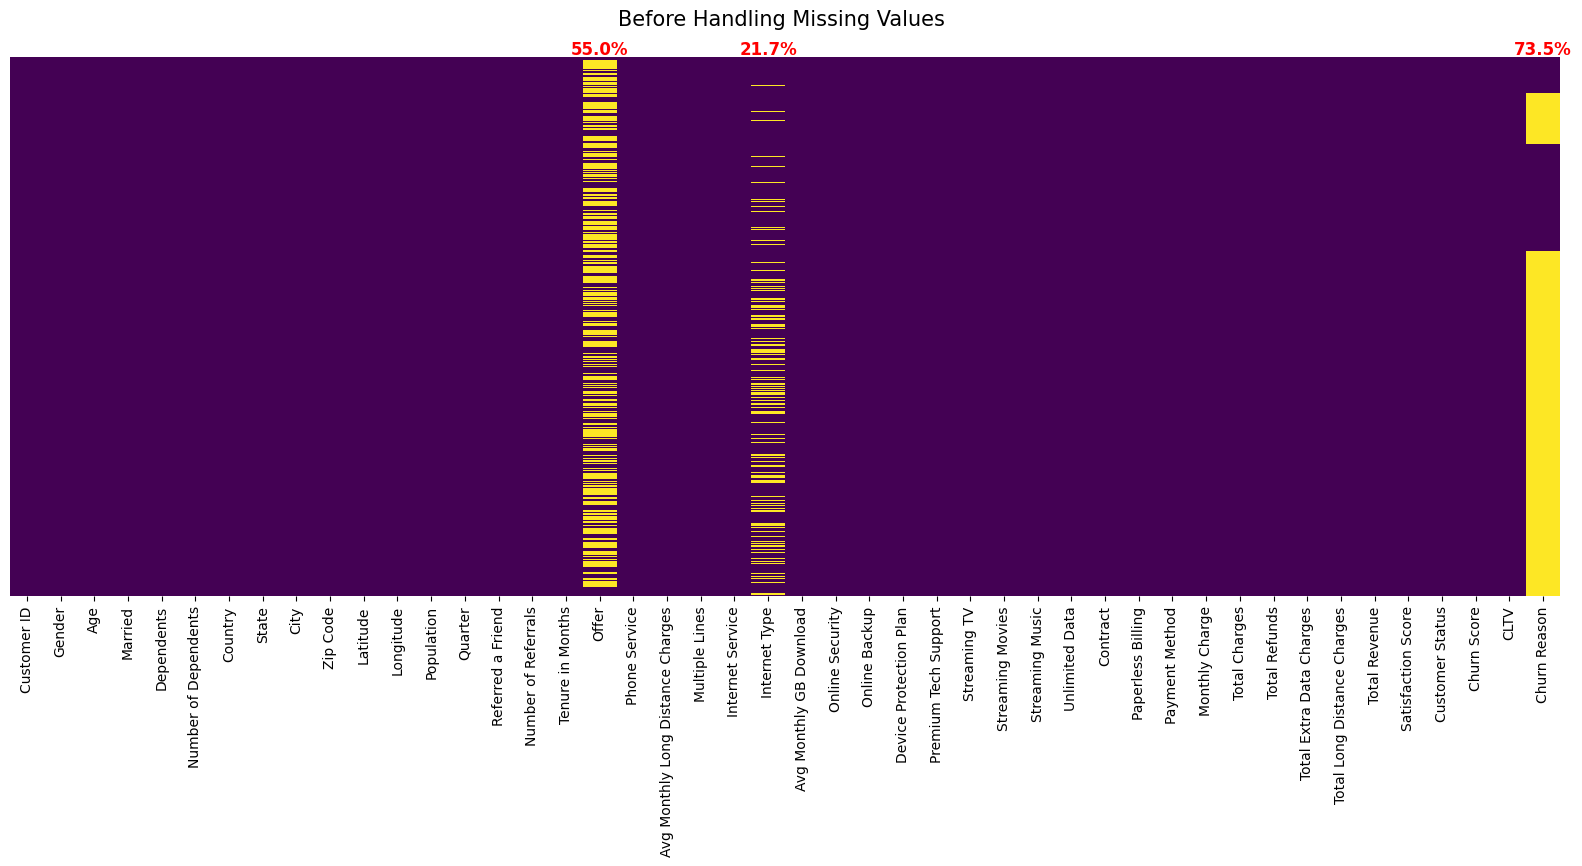

In [5]:
# inspect on missing value
plt.subplots(figsize=(20,7))
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

# add missing value percentage on top of each column
missing_percentage = df.isna().mean() * 100
x_annot = 0.5
y_annot = -100
for col in df.columns:
    if missing_percentage[col] > 0:
        plt.text(x_annot, y_annot, f'{missing_percentage[col]:.1f}%', 
                ha='center', va='center', color='red', fontsize=12, fontweight='bold')
    x_annot += 1
plt.title('Before Handling Missing Values \n', fontsize=15)
plt.show()

In [6]:
# fill in missing value

# 'Offer' Column
# there are 5 distinct types of offer, we will assume data that the missing value means there was no promotion was offered
# therefore we will fill in the missing values with 'No Offer'
df['Offer'] = df['Offer'].fillna('No Offer')

# 'Internet Type' Column
# we will fill in with No since the customer does not subscribe into internet services
df['Internet Type'] = df['Internet Type'].fillna('No')

# 'Churn Reason' Column
# as for churn reason column, we will not do anything since it is align with the number of churned customer

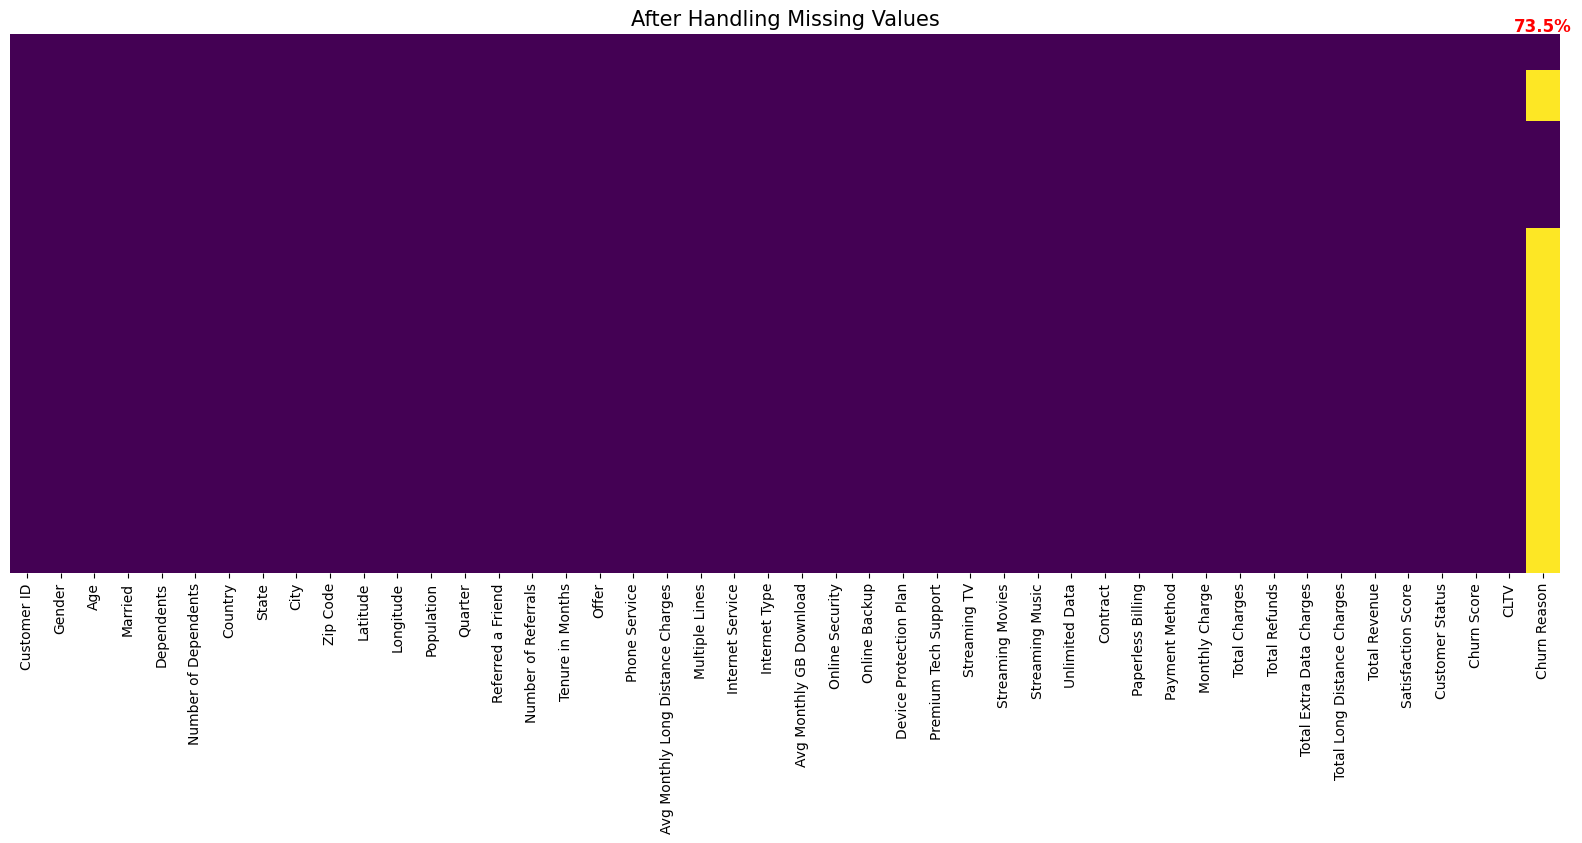

In [7]:
#make sure all data clean
plt.subplots(figsize=(20,7))
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

# add missing value percentage on top of each column
missing_percentage = df.isna().mean() * 100
x_annot = 0.5
y_annot = -100
for col in df.columns:
    if missing_percentage[col] > 0:
        plt.text(x_annot, y_annot, f'{missing_percentage[col]:.1f}%', 
                ha='center', va='center', color='red', fontsize=12, fontweight='bold')
    x_annot += 1
plt.title('After Handling Missing Values', fontsize=15)
plt.show()

<a id="analysis"></a>
<h2>Data Analysis & Business Question</h2>

**Business Question:**  
How can the company improve overall performance by identifying the services trend, customer feedback, and evaluating the impact of offers on revenue generation and customer retention in Q3?

By answering this question, the company can develop data-driven strategies to maximize revenue and improve customer retention in the next quarter.

To address this, the following steps are required:

1. [**Calculating Key Performance Indicators (KPIs):**](#kpi)  
   Derive metrics such as churn rate, customer lifetime value (CLTV), average tenure, and customer satisfaction score to assess the company’s current position and identify key areas for improvement.  

2. [**Data Wrangling:**](#wrangling)  
   Organize and prepare data related to total revenue, subscribed services, and offers, focusing on their impact on churn rate, retention, and customer satisfaction. This will ensure a detailed understanding of how each factor contributes to overall performance.

3. [**Topic Modeling on Churn Reasons:**](#topic)  
   Analyze customer feedback from the churn reason to uncover the top three underlying themes will provide actionable insights to decrease the churn rate.  

This structured approach ensures actionable strategies are built on reliable, evidence-based insights to drive growth and enhance customer satisfaction in the coming quarters.

In [8]:
# Dropping unnecessary columns that will not be used in the analysis

df.drop(['Customer ID', 'Gender', 'Age', 'Married', 'Dependents',
       'Number of Dependents', 'Country', 'State', 'City', 'Zip Code',
       'Latitude', 'Longitude', 'Population', 'Quarter', 'Referred a Friend',
       'Number of Referrals','Avg Monthly Long Distance Charges','Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges'],axis=1,inplace=True)

<a id="kpi"></a>
1. Calculating Key Performance Indicators (KPIs)

In [9]:
# Calculate the KPI metrics for Q3 to show the performance of Q3

# Calculating Important Metrics
total_customers = len(df)
new_customer = len(df[df['Customer Status']=='Joined'])
new_customer_rate = new_customer/total_customers*100
churn_rate = len(df[df['Customer Status']=='Churned'])/total_customers*100
total_revenue = df['Total Revenue'].sum()
average_cltv = df['CLTV'].mean()
satisfaction_score = df['Satisfaction Score'].mean()
avg_tenure = df['Tenure in Months'].mean()

# Create dictionary for the KPI
kpis = {
    'Total Customers' : total_customers,
    'Growth Rate' : f"{new_customer_rate:.2f}%",
    'Churn Rate': f"{churn_rate:.2f}%",
    'Avg. Tenure': f"{avg_tenure:.2f} M",
    'Total Revenue': f"${total_revenue/1000000:.2f}M",
    'Avg. CLTV' : f"${average_cltv:.2f}",
    'Avg. Satisfaction': f"{satisfaction_score:.2f}/5"
}

# Print KPI Results
for key, val in kpis.items():
    print(key, val)

Total Customers 7043
Growth Rate 6.45%
Churn Rate 26.54%
Avg. Tenure 32.39 M
Total Revenue $21.37M
Avg. CLTV $4400.30
Avg. Satisfaction 3.24/5


<a id="wrangling"></a>
2. Data Wrangling

In [10]:
# Generate new feature to clarify chrun status
df['Churn Status'] = df['Customer Status'].apply(lambda x: 1 if x =='Churned' else 0)

In [11]:
# Data Wrangling for Services

# Identify which column gives information about services
services = ['Phone Service','Multiple Lines','Internet Service','Online Security', 
            'Online Backup', 'Device Protection Plan',
            'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
            'Streaming Music', 'Unlimited Data']


# Transform Yes and No value into binary (Yes=1 and No=0)
df[services] = df[services].map(lambda x: 1 if x == 'Yes' else 0)

# Calculate how many services does the customer subscribe
df['Total Services'] = df[services].sum(axis=1)

# Calculate the percentage of customers adoption for each services
service_percentages = df[services].sum() / total_customers * 100

# Convert to a DataFrame for easier plotting
service_summary = service_percentages.sort_values(ascending=False).reset_index()
service_summary.columns = ['Service', 'Percentage']


In [12]:
# Performing Correlation Analysis

# Adding More Metrics to perform Calculation
services_res = services +['Total Services','Satisfaction Score','Total Revenue','Tenure in Months']
correlation_matrix = df[services_res].corr()

# Extract correlations of the two chosen variables with the service-related columns and sort the values based on correlation value of the total revenue
heatmap_data = correlation_matrix.loc[services+['Total Services','Tenure in Months'], ['Total Revenue','Satisfaction Score']].sort_values(['Total Revenue','Satisfaction Score'])

In [13]:
#Calculate the Retention Rate Based on Offering
retention_rates = (df.groupby(['Offer', 'Churn Status'])
    .size() # Calculate the frequency
    .groupby(level=0)
    .apply(lambda x: x / x.sum()*100)  # Calculate percentage
    .unstack()
)

<a id="topic"></a>
3. Text Mining - Topic Modelling

In [14]:
# Import Library - Text Mining Related
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords
# nltk.download('punkt_tab') # Uncomment if needed
# nltk.download('stopwords') # Uncomment if needed
# nltk.download('wordnet') #Uncomment if needed - download
from nltk.tokenize import word_tokenize

In [15]:
# Topic Modelling - Generate 3 main topics of why the customers leave the company

# Ideal text mining workflow: Raw Text -> Tokenizations -> Stop Words Removal -> Stemming -> Word List -> Application

# 1. Raw Text
# Get Unique Text from Churn Reason 
reasons = df['Churn Reason'].dropna().unique().tolist()

# 2. Tokenize text
reasons_tokenize = [word_tokenize(w) for w in reasons]

# 3. Stop words removal
stop_words = set(stopwords.words("english")) # Setting stop words in english
filtered_reasons = [[w.lower() for w in tokens if w.lower() not in stop_words] for tokens in reasons_tokenize]

# 4. Stemming and/or Lemmatization -> Not perform due to low complexity of the data

# 5. Text Mining Application - Topic Modelling using Singular Value Decomposition

# Join text after removing stopwords
joined_reasons = [' '.join(tokens) for tokens in filtered_reasons]

# Create a TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Apply this vectorizer to the documents to create a document-term matrix
X = vectorizer.fit_transform(joined_reasons)

# Apply Truncated SVD
lsa_model = TruncatedSVD(n_components=3)
lsa_model.fit(X)

# Get Topics
def get_lsa_topics(model, vectorizer, top_n=5):
    terms = vectorizer.get_feature_names_out()
    for idx, comp in enumerate(model.components_):
        terms_comp = zip(terms, comp)
        sorted_terms = sorted(terms_comp, key=lambda x: x[1], reverse=True)[:top_n]
        print(f"Topic {idx+1}:")
        for term in sorted_terms:
            print(f"{term[0]} ({round(term[1], 2)})", end=" ")
        print("\n")

        
get_lsa_topics(lsa_model, vectorizer, top_n=3)

Topic 1:
competitor (0.61) offered (0.39) better (0.35) 

Topic 2:
support (0.51) expertise (0.39) poor (0.39) 

Topic 3:
service (0.55) dissatisfaction (0.52) product (0.22) 



<a id="report"></a>
<h1>Report</h1>

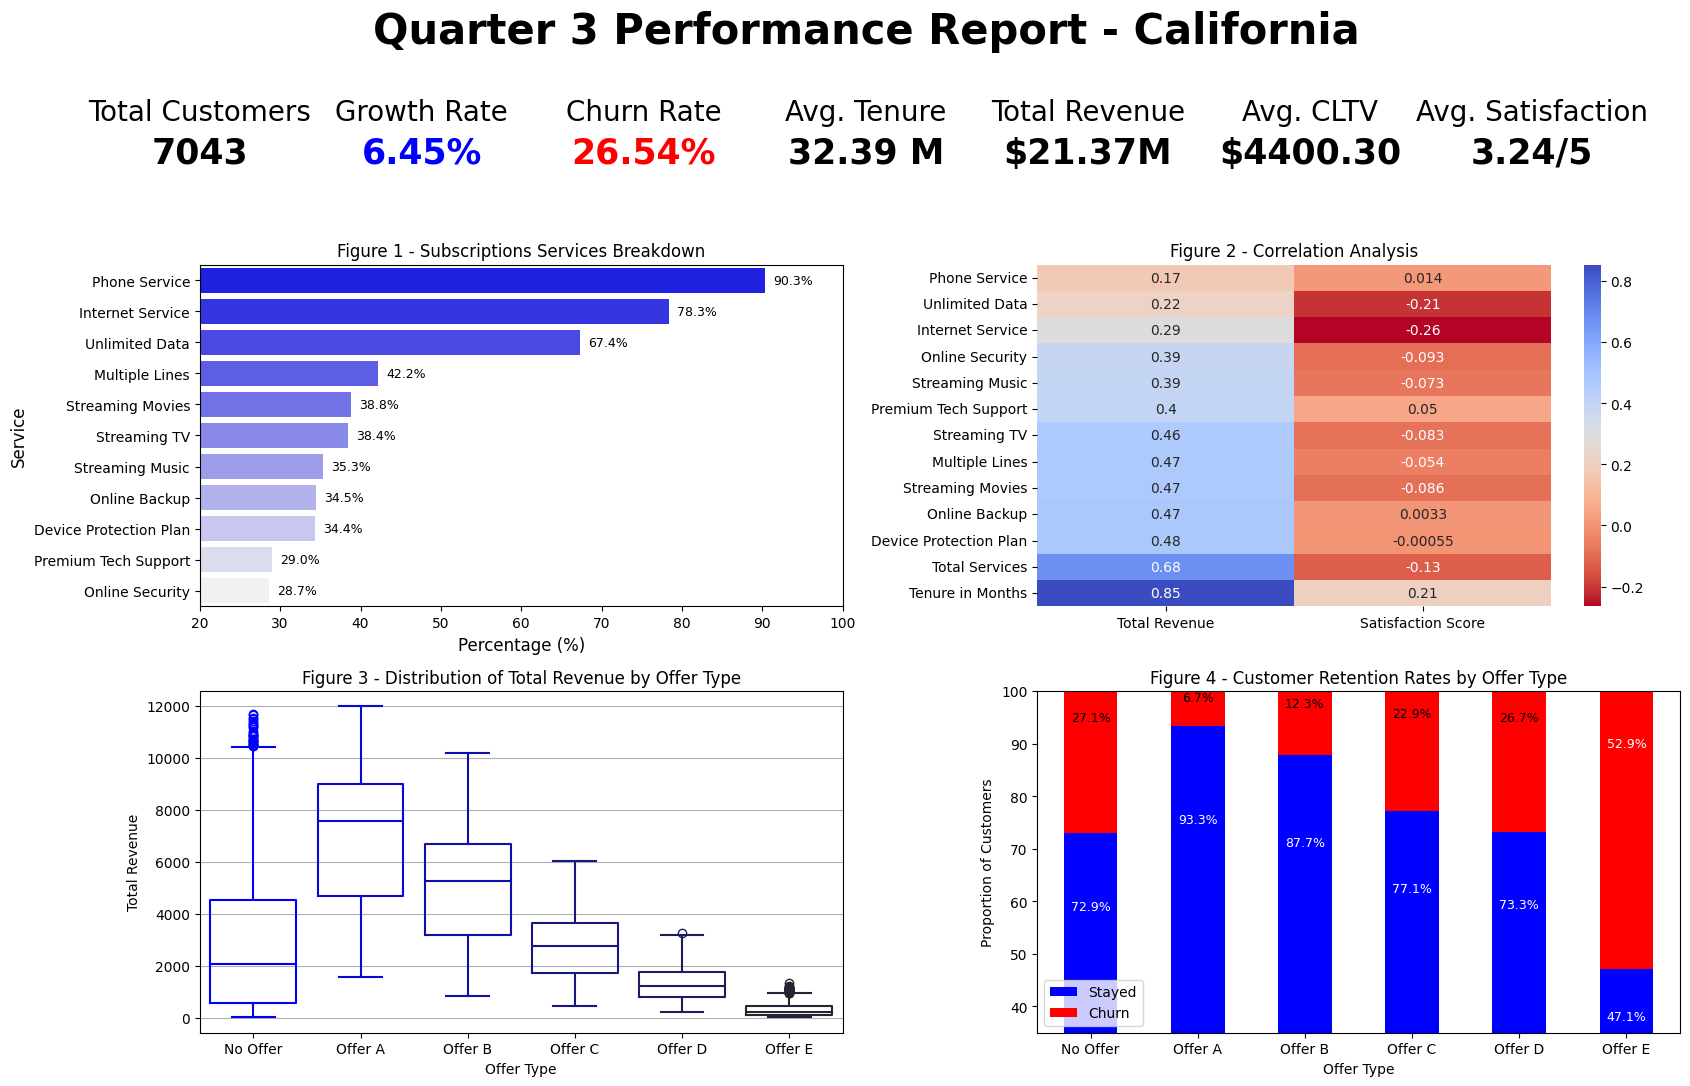

In [16]:
# Create the figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(17,11), gridspec_kw={'height_ratios': [1, 2, 2]})

# turn off all axes
for ax_row in axes:
    for ax in ax_row:
        ax.axis('off')  # Turn off all axes (including the borders)


################################################## Subplot 0 - KPI Metrics ######################################################
# Defing the axis location on subplot
ax0 = plt.subplot2grid((3, 2), (0, 0), colspan=2)  # Full-width top section
ax0.axis('off')  # Turn off the axes for a clean look

# Add KPI title
ax0.text(0.45, 0.8, "Quarter 3 Performance Report - California", fontsize=30, fontweight="bold", ha="center")

# Define positions and colors for each KPI
positions = [ (i*0.15, 0.5) for i in range(7) ]
colors = ['black', 'blue', 'red', 'black','black', 'black', 'black'] 

# Display each KPI
for (x, y), (label, value), color in zip(positions, kpis.items(), colors):
    ax0.text(x, y - 0.15, label, fontsize=20, ha="center", color="black") # Display Key Label - KPI metric
    ax0.text(x, y - 0.4, value, fontsize=25, fontweight="bold", ha="center", color=color) # Display Value of KPI metric


########################################### Subplot 1  - Service Adoption ######################################################

# Defing the axis location on subplot
ax1 = plt.subplot2grid((3,2),(1,0))

# Plotting the Result
sns.barplot(data=service_summary, x='Percentage', y='Service',hue='Service',palette='light:blue_r', ax=ax1)
ax1.set_title('Figure 1 - Subscriptions Services Breakdown')
ax1.set_xlabel('Percentage (%)', fontsize=12)
ax1.set_ylabel('Service', fontsize=12)
ax1.set(xlim=[20,100])


# Display percentage values on the bars
for index, row in service_summary.iterrows():
    ax1.text(row['Percentage'] + 1, index, f"{row['Percentage']:.1f}%", va='center', fontsize=9)



########################################### Subplot 2  - Correlation Analysis ######################################################

# Defing the axis location on subplot
ax2 = plt.subplot2grid((3,2),(1,1))


# Plotting the Result 
sns.heatmap(data=heatmap_data,cmap='coolwarm_r',annot=True, annot_kws={'fontsize':10}, ax=ax2 )
ax2.set_title('Figure 2 - Correlation Analysis')



################################ Subplot 3 - Distribution of Total Revenue based on Offer #########################################

# Defing the axis location on subplot
ax3 = plt.subplot2grid((3,2),(2,0))

# Plotting the Result 
sns.boxplot(data=df.sort_values('Offer'), x='Offer', y='Total Revenue',hue='Offer',legend=False, fill=False,
            palette='dark:blue_r', ax=ax3)
ax3.set_title("Figure 3 - Distribution of Total Revenue by Offer Type")
ax3.set_xlabel("Offer Type")
ax3.set_ylabel("Total Revenue")
ax3.grid(axis="y")



################################## Subplot 4 - Retention Rate based on Offer Type ##################################################

# Defing the axis location on subplot
ax4 = plt.subplot2grid((3,2),(2,1))

# Plotting the result
retention_rates.plot(kind='bar', stacked=True,  color=['blue','red'], ax=ax4)
ax4.set_title("Figure 4 - Customer Retention Rates by Offer Type")
ax4.set_xlabel("Offer Type")
ax4.set_xticks(
    ticks=range(len(retention_rates.index)),  # Index positions
    labels=['No Offer', 'Offer A', 'Offer B', 'Offer C', 'Offer D', 'Offer E'],  # Customizing labels
    rotation=0
)
ax4.set(ylim=[35,100])
ax4.set_ylabel("Proportion of Customers")
ax4.legend(['Stayed','Churn'])

# Annotate percentages on the bars
for i, bar_group in enumerate(ax4.containers):
    for bar in bar_group:
        # Calculate the label position and value
        height = bar.get_height()
        if height > 0:  
            ax4.text(
                bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
                bar.get_y() + height *0.81,  # Y position (middle of the bar)
                f"{height:.1f}%",  # Text to display
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                fontsize=9,  # Font size
                color='white' if height > 40 else 'black'  # Adjust text color for contrast
            )



plt.tight_layout()
plt.show()


<h3>How can the company improve overall performance by identifying the services trend, customer feedback, and evaluating the impact of offers on revenue generation and customer retention in Q3?</h3>

The figure above illustrates the Quarter 3 (Q3) performance for the California Zone, detailing service adoption trend, customer feedback, offer effectiveness and their impacts on revenue and retention. The company’s total customer base stands at 7,043, with a modest growth rate of 6.45%, signaling a need for more aggressive strategies to boost growth as 26.54% customers churned in Q3. In term of revenue, the company achieved a total revenue of $21.37M, with an average Customer Lifetime Value (CLTV) of $4,400.30 and an average tenure of 32 months, underscoring strong profitability potential if customer is retained.

Customer subscription trends (Figure 1) show Phone Service as the most subscribed offering (90.3%), followed by Internet Service (78.3%) and Unlimited Data (67.4%) which serve as company's core offering. On contrast, Online Security (28.7%) and Premium Tech Support (29.0%) exhibit low adoption, presenting opportunities for cross-selling. Figure 2 reveals a strong positive correlation between total revenue and factors like tenure (0.85) and the number of subscribed services (0.68), emphasizing retention and upselling. Services such as streaming, online backup, and device protection plans demonstrate significant correlations with revenue (>0.4), indicating their potential to drive increased revenue generation.

Customer feedback highlights several areas for improvement. The average satisfaction score of 3.24 highlights overall dissatisfaction, with negative correlations observed for Internet Service (-0.26) and Unlimited Data (-0.21), indicating significant issues with these services. The high churn rate, at 26.54%, reflects the loss of over one-quarter of the customer base, posing a serious challenge. Analysis of churn reasons through topic modeling identifies three key drivers: better deals offered by competitors, dissatisfaction with service quality, and inadequate support expertise. On a more positive note, Premium Tech Support shows a slight positive satisfaction correlation (0.05), suggesting that enhanced support contributes to improved customer satisfaction. This indicates the potential benefit of extending high-quality support not only to subscribers of Premium Tech Support but across all services to boost overall customer experience.

From the customer feedback, offering plays a key role to stay competitive. The revenue distribution by offer type (Figure 3) underscores the impact of promotions on revenue generation. Offers A and B exhibit higher median revenues and retention rates (93.3% and 87.3%, respectively, in Figure 4), demonstrating their alignment with customer needs. Conversely, Offers D and E contribute less to revenue and experience higher churn rates, suggesting they may be misaligned with customer expectations. Refining or discontinuing these underperforming offers while scaling up successful ones like Offer A and B can further enhance performance.

To address these challenges, several strategies are recommended. Expanding cross-selling efforts for underutilized services like Online Security and Premium Tech Support can unlock additional revenue. Improving service quality, particularly for Internet Service and Unlimited Data, and overall customer support is essential to boosting customer satisfaction. Optimizing the offer portfolio by refining underperforming offers and scaling up high-performing ones will better align with customer needs. Finally, fostering long-term relationships through proactive engagement and tailored solutions can capitalize on strong tenure correlations and enhance retention. By focusing on these areas, the company can reduce churn, improve customer satisfaction, and achieve sustained revenue growth in the coming quarters.